# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [3]:
powers_df = pd.read_csv('super_hero_powers.csv')
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
display(heroes_df.info())
display(powers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




  #  Cleaning heroes_df

### Null values

In [9]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [25]:
#Analyze Publisher column, type str
heroes_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [26]:
#Drop publisher rows with nan, relative small number of rows to drop (15)
heroes_df.dropna(subset=['Publisher'], inplace=True)

In [32]:
heroes_df['Publisher'].unique()        #Verify nan has been dropped

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [10]:
#Analyze Weight column type float, can see negative values...
heroes_df['Weight'].unique()

array([441.,  65.,  90., -99., 122.,  88.,  61.,  81., 104., 108.,  72.,
       169., 173., 101.,  68.,  57.,  54.,  83.,  86., 358., 135., 106.,
       146.,  63.,  98., 270.,  59.,  50., 126.,  67., 180.,  77.,  52.,
        95.,  79., 133., 181., 216.,  71., 124., 155., 113.,  58.,  92.,
        97.,  56., 230., 495.,  55., 110.,  99., 158.,  74., 116.,  62.,
       170.,  70.,  78., 225., 817.,  27.,  91., 178., 383., 171., 187.,
       132.,  89., 412., 306.,  80., 203.,  96.,  18.,  45., 167.,  16.,
       630., 268.,  nan, 115.,   4.,  48., 119., 207., 191.,   2.,  14.,
        49., 855., 356., 324., 360., 288., 236.,  36., 140., 128., 338.,
       248., 125.,  85., 293.,  69., 405., 117.,  87., 234., 320.,  38.,
        25., 900., 310., 149., 315., 153., 437., 131.,  47., 176., 198.,
       443., 143.,  76.,  82., 105., 331., 214.,  73., 334.,  41., 162.,
        39., 473.,  51.,  17.])

In [11]:
#replace  missing values with median
heroes_df['Weight'].median()  #62
heroes_df['Weight'].fillna(value=heroes_df['Weight'].median(), inplace=True)

In [34]:
heroes_df.loc[heroes_df['Weight'] < 0]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
21,Ando Masahashi,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
26,Angela,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0
31,Anti-Monitor,Male,yellow,God / Eternal,No Hair,61.0,DC Comics,-,bad,-99.0
32,Anti-Spawn,Male,-,-,-,-99.0,Image Comics,-,bad,-99.0


In [40]:
heroes_df.drop(heroes_df[heroes_df.Weight < 0].index, inplace=True)

In [41]:
heroes_df['Weight'].unique

<bound method Series.unique of 0      441.0
1       65.0
2       90.0
3      441.0
5      122.0
7       88.0
8       61.0
9       81.0
10     104.0
11     108.0
12      90.0
13      90.0
16      72.0
17     169.0
19     173.0
20     101.0
22      68.0
24      57.0
25      54.0
27      83.0
28      90.0
29     122.0
30      86.0
33     358.0
34     135.0
36     106.0
37     146.0
38      63.0
39      68.0
40      57.0
       ...  
695     54.0
698     41.0
699    135.0
700    135.0
701     63.0
703     79.0
704    162.0
705     95.0
706     54.0
707    108.0
708     67.0
709    158.0
710     50.0
714     65.0
716    117.0
717     39.0
718    473.0
719    135.0
720     51.0
721    171.0
722     74.0
724    117.0
725     50.0
726     61.0
727     95.0
728     83.0
729     52.0
731     17.0
732     57.0
733     81.0
Name: Weight, Length: 494, dtype: float64>

In [42]:
heroes_df.isna().sum()   #no null values for heroes_df

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [45]:
heroes_df.info()  #check how the structure of the df has changed after null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 733
Data columns (total 10 columns):
name          494 non-null object
Gender        494 non-null object
Eye color     494 non-null object
Race          494 non-null object
Hair color    494 non-null object
Height        494 non-null float64
Publisher     494 non-null object
Skin color    494 non-null object
Alignment     494 non-null object
Weight        494 non-null float64
dtypes: float64(2), object(8)
memory usage: 42.5+ KB


### Placeholders: check each column 

In [46]:
# check for name column
heroes_df['name'].value_counts().value_counts()   #no placeholers here..

1    479
2      6
3      1
Name: name, dtype: int64

In [47]:
# check for gender column
heroes_df['Gender'].value_counts()

Male      338
Female    142
-          14
Name: Gender, dtype: int64

In [48]:
#categorical - remove 14 rows
#get names of indexes where colum gender = - 
gender_placeholder = heroes_df[heroes_df.Gender == "-"].index
heroes_df.drop(gender_placeholder, inplace=True)
heroes_df['Gender'].value_counts()

Male      338
Female    142
Name: Gender, dtype: int64

In [49]:
#check for Eye color column
heroes_df['Eye color'].value_counts()

blue                       195
brown                      104
green                       62
red                         38
-                           20
black                       12
yellow                      12
white                       10
hazel                        5
grey                         5
gold                         3
purple                       3
violet                       2
amber                        2
green / blue                 1
blue / white                 1
yellow / blue                1
silver                       1
indigo                       1
yellow (without irises)      1
white / red                  1
Name: Eye color, dtype: int64

In [50]:
#categorical - remove rows
#get names of indexes where colum Eye color is - 
eyecolor_placeholder = heroes_df[heroes_df['Eye color'] == "-"].index
heroes_df.drop(eyecolor_placeholder, inplace=True)
heroes_df['Eye color'].value_counts()

blue                       195
brown                      104
green                       62
red                         38
yellow                      12
black                       12
white                       10
grey                         5
hazel                        5
purple                       3
gold                         3
violet                       2
amber                        2
blue / white                 1
yellow / blue                1
green / blue                 1
white / red                  1
silver                       1
indigo                       1
yellow (without irises)      1
Name: Eye color, dtype: int64

In [51]:
#check for race column
heroes_df['Race'].value_counts()

Human                151
-                    150
Mutant                51
Human / Radiation     11
Cyborg                 8
Symbiote               7
Alien                  6
Android                6
Demon                  6
Kryptonian             5
Asgardian              5
Atlantean              5
Inhuman                4
New God                3
Eternal                2
Amazon                 2
Human / Altered        2
Metahuman              2
Demi-God               2
God / Eternal          2
Human-Kree             2
Luphomoid              1
Zombie                 1
Human-Vulcan           1
Zen-Whoberian          1
Kakarantharaian        1
Gorilla                1
Strontian              1
Bizarro                1
Talokite               1
Neyaphem               1
Frost Giant            1
Bolovaxian             1
Martian                1
Human / Cosmic         1
Clone                  1
Ungaran                1
Flora Colossus         1
Human-Vuldarian        1
Czarnian               1


In [52]:
#drop it!
# get names of indexes where colum Race is - 
race_placeholder = heroes_df[heroes_df['Race'] == "-"].index
heroes_df.drop(race_placeholder, inplace=True)
heroes_df['Race'].value_counts()

Human                151
Mutant                51
Human / Radiation     11
Cyborg                 8
Symbiote               7
Android                6
Demon                  6
Alien                  6
Asgardian              5
Atlantean              5
Kryptonian             5
Inhuman                4
New God                3
Demi-God               2
Human / Altered        2
Eternal                2
Human-Kree             2
Metahuman              2
God / Eternal          2
Amazon                 2
Strontian              1
Luphomoid              1
Zombie                 1
Icthyo Sapien          1
Vampire                1
Zen-Whoberian          1
Kakarantharaian        1
Gorilla                1
Korugaran              1
Talokite               1
Neyaphem               1
Human-Vulcan           1
Human-Vuldarian        1
Martian                1
Bizarro                1
Frost Giant            1
Clone                  1
Ungaran                1
Flora Colossus         1
Czarnian               1


In [53]:
#check for hair color column
heroes_df['Hair color'].value_counts()

Black               86
Blond               53
Brown               46
No Hair             39
Red                 24
White               15
Auburn               9
Green                6
-                    5
Strawberry Blond     4
Purple               3
blond                3
Brown / White        3
Grey                 3
Silver               2
black                2
Blue                 2
Orange               1
Brownn               1
Black / Blue         1
Magenta              1
Red / Orange         1
Name: Hair color, dtype: int64

In [54]:
#drop  5 rows 
haircolor_placeholder = heroes_df[heroes_df['Hair color'] == "-"].index
heroes_df.drop(haircolor_placeholder, inplace=True)
heroes_df['Hair color'].value_counts()

Black               86
Blond               53
Brown               46
No Hair             39
Red                 24
White               15
Auburn               9
Green                6
Strawberry Blond     4
blond                3
Purple               3
Brown / White        3
Grey                 3
Silver               2
black                2
Blue                 2
Orange               1
Brownn               1
Black / Blue         1
Magenta              1
Red / Orange         1
Name: Hair color, dtype: int64

In [55]:
#check for height column
heroes_df['Height'].value_counts()

183.0    38
188.0    34
178.0    21
180.0    20
175.0    19
185.0    19
165.0    16
193.0    15
170.0    14
198.0    13
191.0    12
168.0    12
173.0     9
201.0     8
196.0     7
157.0     4
203.0     4
213.0     3
244.0     3
229.0     3
211.0     3
163.0     3
155.0     2
218.0     2
122.0     2
137.0     2
975.0     1
15.2      1
142.0     1
876.0     1
71.0      1
234.0     1
64.0      1
366.0     1
206.0     1
160.0     1
66.0      1
267.0     1
259.0     1
287.0     1
305.0     1
279.0     1
226.0     1
Name: Height, dtype: int64

In [56]:
#check for skin color column
#heroes_df.head()
heroes_df['Skin color'].value_counts()

-             255
green          14
red             7
blue            7
white           5
grey            4
purple          3
silver          2
gold            2
pink            2
yellow          2
blue-white      1
orange          1
Name: Skin color, dtype: int64

In [57]:
# due to the high missing values for this column I create another category 'unknown'
heroes_df.replace(to_replace=(heroes_df['Skin color'] == "-"), value='unknown')
heroes_df.loc[heroes_df['Skin color'] == '-']
heroes_df.loc[heroes_df['Skin color'].str.contains('-'), 'Skin color']
heroes_df.loc[heroes_df['Skin color'] == '-', 'Skin color'] = 'unknown'

In [59]:
heroes_df['Skin color'].value_counts()

unknown       255
green          14
red             7
blue            7
white           5
grey            4
purple          3
silver          2
gold            2
pink            2
yellow          2
blue-white      1
orange          1
Name: Skin color, dtype: int64

In [60]:
#check for alignment column
heroes_df['Alignment'].value_counts()

good       205
bad         80
neutral     17
-            3
Name: Alignment, dtype: int64

In [61]:
alignment_placeholder = heroes_df[heroes_df.Alignment == "-"].index
heroes_df.drop(alignment_placeholder, inplace=True)
heroes_df['Alignment'].value_counts()

good       205
bad         80
neutral     17
Name: Alignment, dtype: int64

In [62]:
#check for weight column
heroes_df['Weight'].value_counts()

79.0     16
81.0     14
90.0     12
59.0     10
52.0     10
77.0      9
54.0      9
101.0     9
63.0      9
56.0      9
86.0      8
95.0      8
50.0      7
74.0      7
97.0      7
83.0      7
135.0     7
99.0      6
57.0      6
88.0      5
58.0      4
72.0      4
203.0     4
158.0     4
70.0      3
225.0     3
61.0      3
104.0     3
146.0     3
106.0     3
         ..
51.0      1
17.0      1
817.0     1
495.0     1
293.0     1
315.0     1
437.0     1
320.0     1
80.0      1
125.0     1
268.0     1
178.0     1
187.0     1
443.0     1
110.0     1
412.0     1
306.0     1
45.0      1
16.0      1
270.0     1
338.0     1
207.0     1
14.0      1
356.0     1
324.0     1
230.0     1
236.0     1
36.0      1
128.0     1
89.0      1
Name: Weight, Length: 101, dtype: int64

# Cleaning powers_df

In [64]:
#powers_df.isna().sum()

In [65]:
#one sum() doesn't show the complete list.
#from https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
#In order to get the total summation of all missing values in the DataFrame, we chain two .sum() methods together

powers_df.isna().sum().sum()     # 0: there are NOT null values in the dataframe

0

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [79]:
#Inner join - by names, to do it the column containing names needs to be renamed
powers_df.set_index('name', inplace=True)
powers_df.head(10)

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Adam Monroe,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,False,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
#set name as index
heroes_df.set_index('name', inplace=True)
heroes_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,unknown,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,unknown,bad,441.0
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,unknown,bad,122.0


In [80]:
joined_df = heroes_df.join(powers_df, how='inner', on='name')

In [81]:
joined_df.head(10)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,unknown,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,unknown,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,unknown,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,unknown,good,88.0,False,...,False,False,False,False,False,False,False,False,False,False
Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,unknown,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False
Ajax,Male,brown,Cyborg,Black,193.0,Marvel Comics,unknown,bad,90.0,True,...,False,False,False,False,False,False,False,False,False,False
Ammo,Male,brown,Human,Black,188.0,Marvel Comics,unknown,bad,101.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [82]:
male_df = joined_df[joined_df['Gender'] == 'Male']
male_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,unknown,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,unknown,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,unknown,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
female_df = joined_df[joined_df['Gender'] == 'Female']
female_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,unknown,good,57.0,True,...,False,False,False,False,False,False,False,False,False,False
Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,unknown,good,63.0,True,...,True,False,False,False,False,False,False,False,False,False
Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0,True,...,False,False,False,False,False,False,False,False,False,False
Aurora,Female,blue,Mutant,Black,180.0,Marvel Comics,unknown,good,63.0,False,...,False,False,False,False,False,False,False,False,False,False
Batgirl,Female,green,Human,Red,170.0,DC Comics,unknown,good,57.0,False,...,False,False,False,False,False,False,False,False,False,False


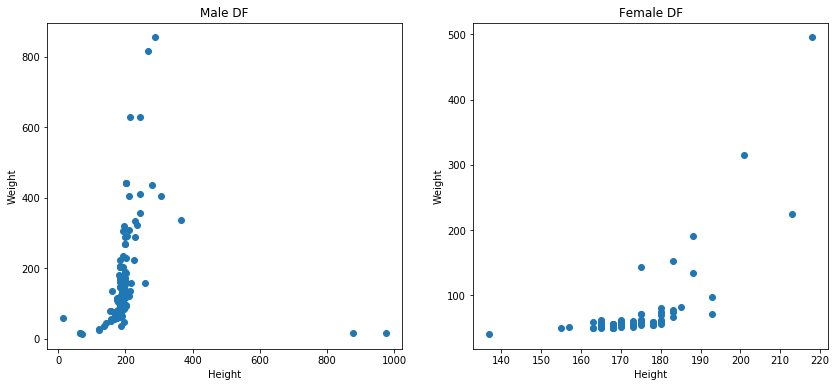

In [84]:
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(121)
ax1.scatter(male_df['Height'],male_df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Male DF')

ax2 = fig.add_subplot(122)
ax2.scatter(female_df['Height'],female_df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Female DF')

plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [85]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe[column_name])
    plt.title('Distribution of {} / {} combination'.format(gender, column_name))

/Users/natalia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


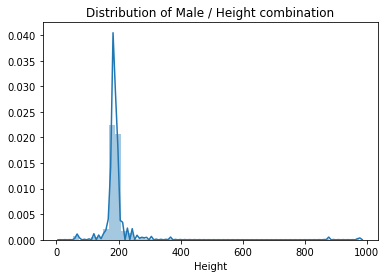

In [86]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height');

/Users/natalia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


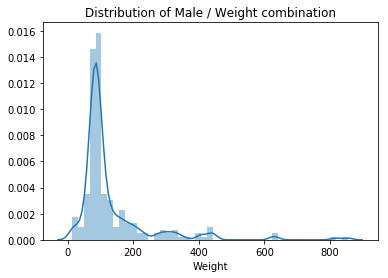

In [87]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight');

/Users/natalia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


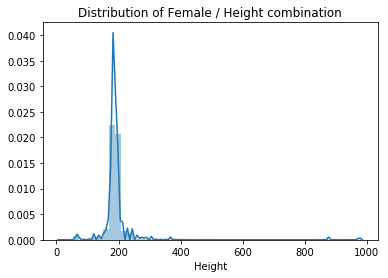

In [88]:
# Female Height
show_distplot(male_heroes_df, 'Female', 'Height');

/Users/natalia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


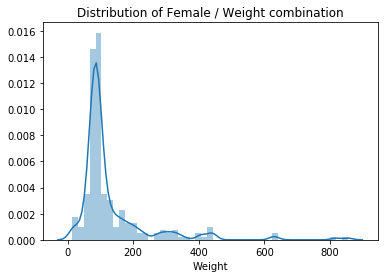

In [89]:
# Female Weight
show_distplot(male_heroes_df, 'Female', 'Weight');

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [90]:
       # 5 most common powers overall

#select boolean columns and sum true values
power_count = joined_df.select_dtypes(include=['bool']).sum(axis=0)
#sort for a series
power_count.sort_values(ascending=False).head()

Super Strength    184
Stamina           174
Agility           157
Durability        150
Super Speed       144
dtype: int64

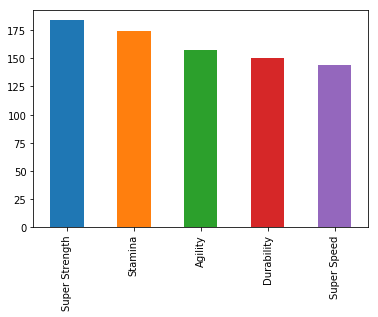

In [91]:
power_count.sort_values(ascending=False).head().plot(kind='bar');

In [92]:
     #5 most common powers in the Marvel Universe

marvel_df = joined_df[joined_df['Publisher'] == 'Marvel Comics']
marvel_df.head()
power_marvel = marvel_df.select_dtypes(include=['bool']).sum(axis=0)
power_marvel.sort_values(ascending=False).head()

Super Strength    116
Stamina           107
Durability         96
Agility            93
Super Speed        86
dtype: int64

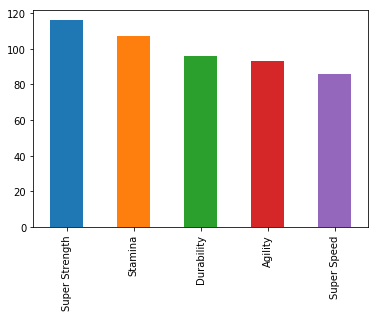

In [93]:
power_marvel.sort_values(ascending=False).head().plot(kind='bar');

In [94]:
     #5 most common powers in the DC Universe
    
dc_df = joined_df[joined_df['Publisher'] == 'DC Comics']
dc_df.head()
power_dc = dc_df.select_dtypes(include=['bool']).sum(axis=0)
power_dc.sort_values(ascending=False).head()

Super Strength    60
Stamina           57
Agility           54
Super Speed       50
Durability        47
dtype: int64

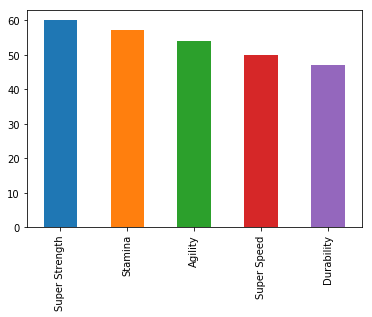

In [95]:
power_dc.sort_values(ascending=False).head().plot(kind='bar');

In [96]:
# One function for all!!

def common_powers(dataframe):
    for col in dataframe.columns.values:
        df = dataframe.select_dtypes(include=['bool']).sum(axis=0)
        return df.sort_values(ascending=False).head()

#common_powers(joined_df)
#common_powers(joined_df[joined_df['Publisher'] == 'Marvel Comics'])
common_powers(joined_df[joined_df['Publisher'] == 'DC Comics'])

Super Strength    60
Stamina           57
Agility           54
Super Speed       50
Durability        47
dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

### Is there a relationship between a hero's height and weight?

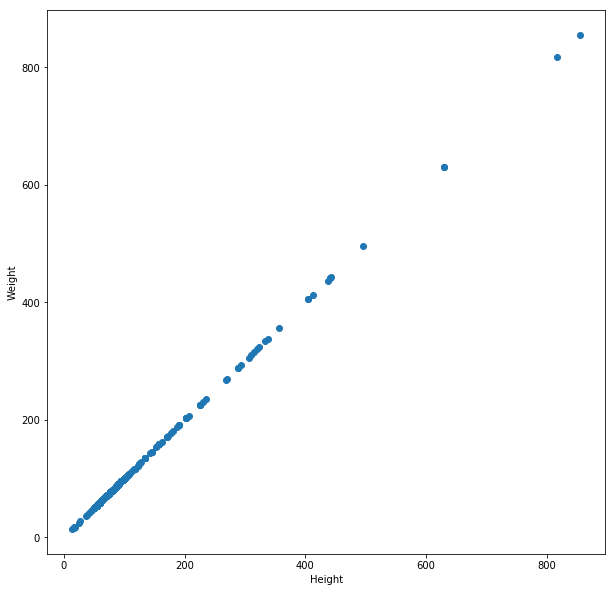

In [97]:
fig = plt.figure(figsize=(10,10))

plt.scatter(heroes_df['Weight'], heroes_df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()

Yes, theres is a linear relationship

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data